In [1]:
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.tokens import Token
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
from wordcloud import WordCloud, STOPWORDS
from matplotlib import rcParams
from spacy.lang.en.stop_words import STOP_WORDS


In [2]:
# only upload two features
df_1 = pd.read_csv('five_hotels.csv', usecols = ['reviews', 'review_rating'])
df_2 = pd.read_csv('last_hotels.csv', usecols = ['reviews', 'review_rating'])
df = pd.concat([df_1, df_2])
# reseting index
df = df.reset_index(drop=True)

In [3]:
df.head()

,reviews,review_rating
0,Let me start off by saying that I understand t...,10
1,We had yet another wonderful visit at this hot...,50
2,It was one of the best hotels I have ever stay...,50
3,This hotel is just fantastic. The location is...,50
4,Amazing park views from this hotel : ) Nicole ...,50


## Cleaning Dataset

In [4]:
# remove 0 from review_rating
df['review_rating'] = df.review_rating.apply(lambda x: int(str(x).split()[0][0]))


In [5]:
# First convert to lower case then removed Punctuations, Numbers, Special Characters and finally remove duplicated spaces 
# return a list of characters

df['reviews'] = df['reviews'].str.replace("[^a-zA-Z]", " ").str.replace("\s+", " ").str.lower()


In [7]:
# removing words less than 3
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


## Tokenize, Remove Stop Words and Lemmatization¶


In [8]:
# adding hotel to Stopwords
nlp.vocab["hotel"].is_stop = True
nlp.vocab["hotel"].is_stop 


True

In [9]:
# it takes time becuase it returns meninfull words
def remove_stop(doc_tokens):
    """removes stop words and returns list of all nonstop words that are lemmatized"""
     return [token.lemma_ for token in doc_tokens if not token.is_stop]

In [10]:
df['Reviews_tokenize'] = df['reviews'].apply(lambda x: remove_stop(nlp(x)))


In [11]:

df['Reviews_tokenize_join'] = df['Reviews_tokenize'].apply(lambda x: ' '.join(x))


In [12]:
df.head()

,reviews,review_rating,Reviews_tokenize,Reviews_tokenize_join
0,start saying that understand that this hard ti...,1,"[start, say, understand, hard, time, city, cou...",start say understand hard time city country en...
1,another wonderful visit this hotel this time w...,5,"[wonderful, visit, time, park, view, thank, up...",wonderful visit time park view thank upgrade l...
2,best hotels have ever stayed absolutely worth ...,5,"[good, hotel, stay, absolutely, worth, money, ...",good hotel stay absolutely worth money view ce...
3,this hotel just fantastic location spot being ...,5,"[fantastic, location, spot, step, central, par...",fantastic location spot step central park view...
4,amazing park views from this hotel nicole staf...,5,"[amazing, park, view, nicole, staff, professio...",amazing park view nicole staff professional fr...


## Bag of Words

In [13]:
def counter(st_):
    dic = {}
    all_words = ' '.join([text for text in st_])
    all_words = all_words.split()
    for i in all_words:
        if i not in dic:
            dic[i] = 1
        else:
            dic[i] +=1
    return dic
#     return sorted(dic, key=lambda x: x[0]) 
#     return {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}

        

In [14]:
count_dict = {word :count  for word, count in counter(df['Reviews_tokenize_join']).items()}

In [15]:
df_freque = pd.DataFrame(count_dict.items(), columns=['word', 'count'])
df_freque.sort_values(['count'], inplace = True , ascending = False)
df_freque.head()
df_count_word = df_freque.iloc[:20]

In [16]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="count", y="word", data=df_count_word)
ax.set(title = 'Frequency Word')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 2000x1000 with 1 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

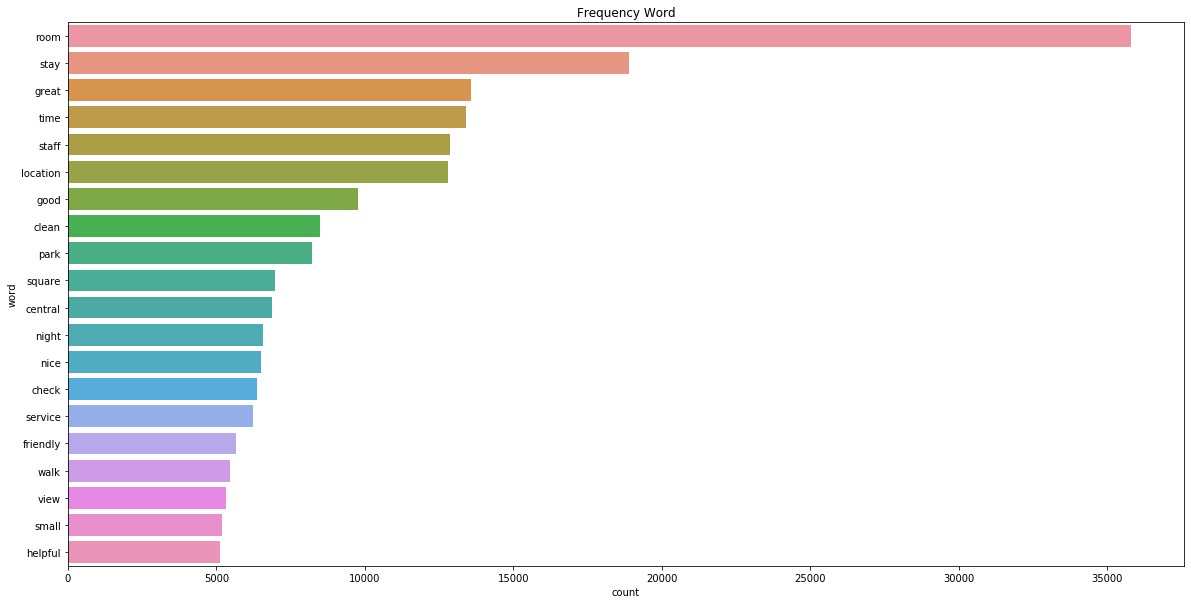

In [17]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="count", y="word", data=df_count_word)
ax.set(title = 'Frequency Word')
plt.show()

## Word Cloud

In [21]:
def show_wordcloud(data, title = None): 
    wordcloud = WordCloud( collocations=False,
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=50, 
        scale=4,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

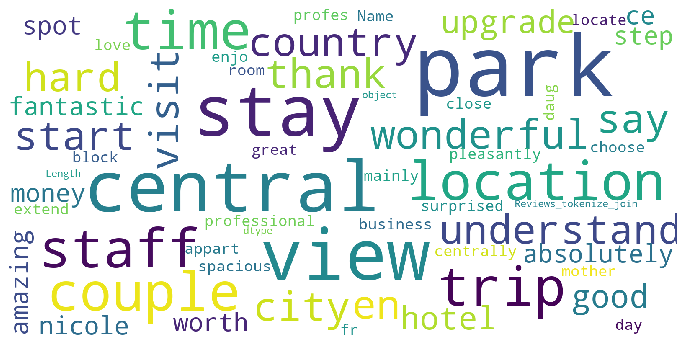

In [22]:
show_wordcloud(df['Reviews_tokenize_join'])

## Save it in a csv file

In [21]:
df.to_csv('data_for_model.csv', index = False)